In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [21]:
def load_dataframe(csv_path):
    df = pd.read_csv(csv_path)
    y = df["label"]
    X = df.drop(["label"], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    return X_train, X_test, y_train, y_test

In [22]:
# Train Logistic Regression model
def train_logistic_regression(X_train, y_train):
    lor = LogisticRegression(max_iter=5000)
    lor.fit(X_train, y_train)
    return lor

In [23]:
# Train Random Forest model
def train_random_forest(X_train, y_train):
    rf = RandomForestClassifier(n_estimators=100, random_state=5)
    rf.fit(X_train, y_train)
    return rf

In [24]:
# Train Support Vector Machine (SVM) model
def train_svm(X_train, y_train):
    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, y_train)
    return svm

In [25]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    if hasattr(model, "classes_") and len(model.classes_) > 2:
        y_pred_proba = model.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    elif hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_pred_proba)
    else:
        auc_roc = None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if auc_roc is not None:
        print(f"AUC-ROC: {auc_roc:.4f}")

    plt.figure()
    if auc_roc is not None:
        if hasattr(model, "classes_") and len(model.classes_) > 2:
            for i in range(len(model.classes_)):
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=model.classes_[i])
                plt.plot(fpr, tpr, lw=2, label=f'ROC curve (class {model.classes_[i]}) (area = {roc_auc_score(y_test == model.classes_[i], y_pred_proba[:, i]):.4f})')
        else:
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_roc:.4f})')
    else:
        print("AUC-ROC not available for this model.")

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic ({type(model).__name__})')
    plt.legend(loc="lower right")
    plt.show()

In [26]:
# Main execution
csv_path = 'Crop_recommendation.csv'  # Ensure this file path is correct
X_train, X_test, y_train, y_test = load_dataframe(csv_path)

Model: LogisticRegression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000


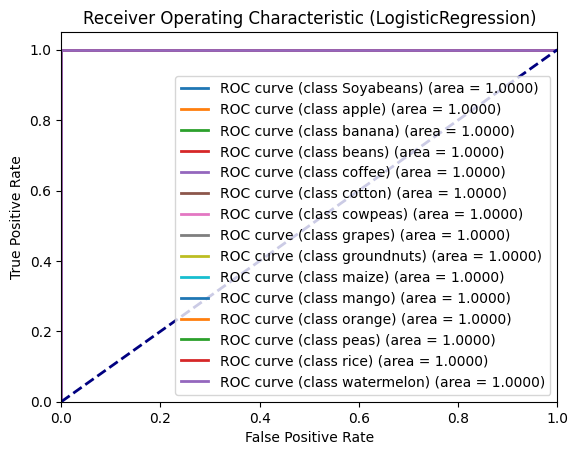

In [27]:
# Train and evaluate Logistic Regression
lor = train_logistic_regression(X_train, y_train)
evaluate_model(lor, X_test, y_test)

Model: RandomForestClassifier
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000


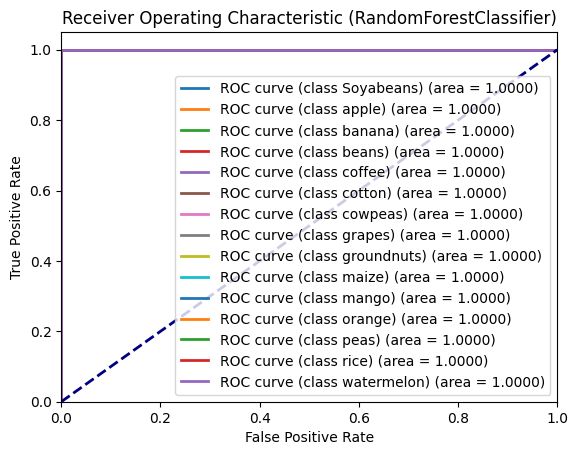

In [28]:
# Train and evaluate Random Forest
rf = train_random_forest(X_train, y_train)
evaluate_model(rf, X_test, y_test)

Model: SVC
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
AUC-ROC: 1.0000


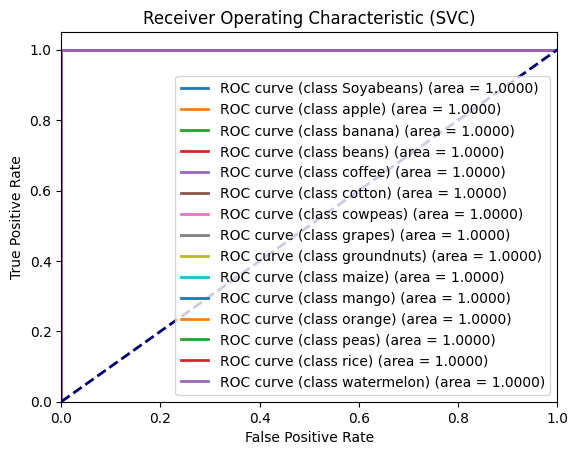

In [29]:
# Train and evaluate SVM
svm = train_svm(X_train, y_train)
evaluate_model(svm, X_test, y_test)